In [6]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
from os import path

In [8]:
%ls post-bootstrap

bh_results_10_28_2020_843_cf.csv  nsd_results.csv
bh_results_10_28_2020_843.csv     nsi_results_10_28_2020_843.csv
bh_results.csv                    nsi_results.csv
nsd_results_10_28_2020_843.csv    nss_results_13_01_2021.csv


In [4]:
#fpath = 'post-bootstrap'
#postfix = '_results_10_28_2020_843.csv'
#filenames = [path.join('.',fpath,f + postfix) for f in ['bh','nsi','nsd']]
#data_bh,data_nsi,data_nsd = [pd.read_csv(f) for f in filenames]

In [10]:
fpath = 'post-bootstrap'
filenames = ['bh_results_10_28_2020_843.csv', 'nss_results_13_01_2021.csv']
filenames = [path.join('.',fpath,f) for f in filenames]
data_bh, data_nss = [pd.read_csv(f) for f in filenames]

In [11]:
data_bh

,EOS,KL_CI_L,KL_CI_U,TV_CI_L,TV_CI_U,KL_MEAN,TV_MEAN
0,0,0.459857,0.629182,0.288486,0.374338,0.5277,0.3242
1,1,0.741362,1.846760,0.431560,0.678532,1.0111,0.5231
2,2,0.687646,2.509215,0.410010,0.705836,0.9992,0.5193
3,3,0.593218,0.998222,0.366233,0.515424,0.7287,0.4267
4,4,0.600856,1.047445,0.371866,0.529870,0.7524,0.4373
5,5,0.629603,1.267285,0.384245,0.578428,0.8081,0.4571


In [12]:
data_nss

,EOS,KL_CI_L,KL_CI_U,TV_CI_L,TV_CI_U,KL_MEAN,TV_MEAN
0,0,0.023361,0.124162,0.072961,0.169908,0.066457,0.124983
1,1,0.016442,0.151274,0.063480,0.192636,0.070505,0.132698
2,2,0.018657,0.179757,0.068814,0.209827,0.081931,0.143487
3,3,0.010173,0.109667,0.040812,0.166414,0.043559,0.104940
4,4,0.002145,0.073405,0.018282,0.136291,0.017763,0.068441
5,5,0.002172,0.084681,0.018665,0.146585,0.024800,0.080194


In [13]:
rc('font',size=16)

In [14]:
def offset_to_zero(dset,tpe):
    means = dset[f'{tpe}_MEAN'].copy()
    ci_l = means - dset[f'{tpe}_CI_L'].copy()
    ci_u = dset[f'{tpe}_CI_U'].copy() - means
    dset[f'{tpe}_CI_PLUS'] = ci_u
    dset[f'{tpe}_CI_MINUS'] = ci_l
    offset = means.mean()
    means -= offset
    #ci_l -= offset
    #ci_u -= offset
    return means, np.vstack((ci_l,ci_u))

In [15]:
KL_BH_d, KL_BH_BND = offset_to_zero(data_bh,'KL')

In [16]:
data_bh["KL_CI_MINUS"]

0    0.067843
1    0.269738
2    0.311554
3    0.135482
4    0.151544
5    0.178497
Name: KL_CI_MINUS, dtype: float64

In [17]:
TV_BH_d, TV_BH_BND = offset_to_zero(data_bh,'TV')

In [18]:
#KL_NSI_d, KL_NSI_BND = offset_to_zero(data_nsi, 'KL')
#TV_NSI_d, TV_NSI_BND = offset_to_zero(data_nsi, 'TV')
#KL_DNS_d, KL_DNS_BND = offset_to_zero(data_nsd, 'KL')
#TV_DNS_d, TV_DNS_BND = offset_to_zero(data_nsd, 'TV')

In [19]:
KL_NSS_d, KL_NSS_BND = offset_to_zero(data_nss,'KL')
TV_NSS_d, TV_NSS_BND = offset_to_zero(data_nss,'TV')

In [20]:
data_nss["KL_CI_MINUS"]

0    0.043096
1    0.054063
2    0.063274
3    0.033385
4    0.015618
5    0.022629
Name: KL_CI_MINUS, dtype: float64

In [21]:
ids = np.arange(6)
idlabels = ['DD2','SFHo','SFHx',r'BHB$\lambda\phi$','TM1','NL3']

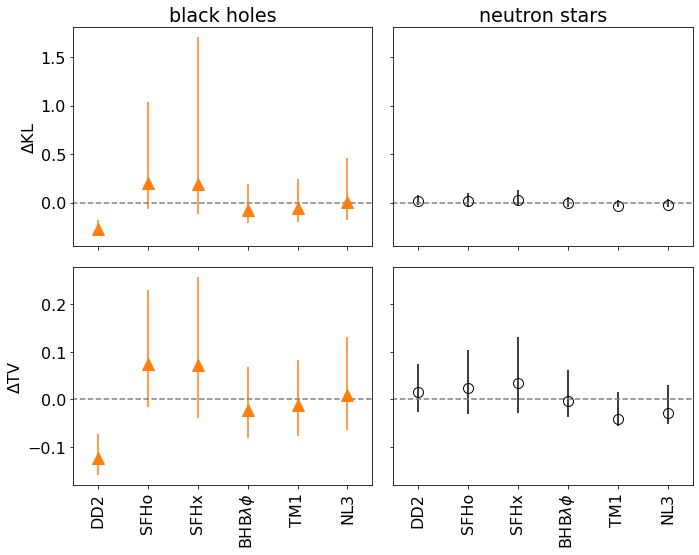

In [23]:
fig,axarr = plt.subplots(2,2,sharex=True,sharey='row',figsize=(10,8))
for i in range(2):
    for j in range(2):
        xrange = np.linspace(-1,ids[-1]+1)
        axarr[i,j].set_xlim(-0.5,ids[-1]+0.5)
        axarr[i,j].plot(xrange,np.zeros_like(xrange),ls='--',color='grey')

axarr[0,0].errorbar(ids,KL_BH_d,KL_BH_BND,ls=' ',marker='^',label='BH',ms=12,color='#ff7f0e')
#axarr[0,0].set_ylim(-0.5,0.5)
axarr[0,0].set_ylabel(r'$\Delta$KL')

axarr[0,1].errorbar(ids,KL_NSS_d, KL_NSS_BND, ls = ' ',marker='o',label='NSS', ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[0,1].errorbar(ids-0.1,KL_DNS_d, KL_DNS_BND, ls = ' ',marker='o',label='double', ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[0,1].errorbar(ids+0.1,KL_NSI_d, KL_NSI_BND, ls=' ',marker='*',label='single', ms=8,color='#17becf')#color='#1f77b4')
#axarr[0,1].plot(ids-0.1,KL_DNS_d, ls = ' ',marker='o',label='double', ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[0,1].plot(ids+0.1,KL_NSI_d, ls=' ',marker='*',label='single', ms=8,color='#17becf')#color='#1f77b4')
#axarr[0,1].set_ylim(-0.5,0.9)

axarr[1,0].errorbar(ids,TV_BH_d,TV_BH_BND,ls=' ',marker='^',label='BH',ms=12,color='#ff7f0e')
axarr[1,0].set_ylabel(r'$\Delta$TV')
#axarr[1,0].set_ylim(-0.3,0.8)

axarr[1,1].errorbar(ids,TV_NSS_d, KL_NSS_BND, ls=' ', marker='o',label='NSS',ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[1,1].errorbar(ids-0.1,TV_DNS_d, KL_DNS_BND, ls=' ', marker='o',label='double',ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[1,1].plot(ids-0.1,TV_DNS_d, ls=' ', marker='o',label='double',ms=10,fillstyle='none',color='k')#'#2ca02c')
#axarr[1,1].errorbar(ids+0.1,TV_NSI_d, KL_NSI_BND, ls=' ',marker='*',label='single',ms=8,color='#17becf')#'#1f77b4',)
#axarr[1,1].set_ylim(-0.15,0.15)

axarr[0,0].set_title('black holes')
axarr[0,1].set_title('neutron stars')

for j in range(2):
    axarr[1,j].set_xticks(ids)
    axarr[1,j].set_xticklabels(idlabels,rotation=90)
#axarr[0,1].legend(ncol=2,loc='upper center')
plt.tight_layout()

plt.savefig('delta-distances.png',bbox_inches='tight',dpi=600)
plt.savefig('delta-distances.pdf',bbox_inches='tight',dpi=600)

In [26]:
positives = np.zeros_like(ids)
negatives = np.zeros_like(ids)
for dset in [KL_BH_d,KL_NSS_d,TV_BH_d,TV_NSS_d]:
    positives += (dset > 0)
    negatives -= (dset < 0)

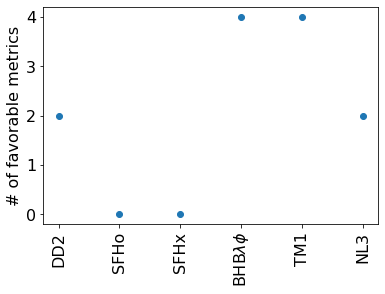

In [27]:
plt.scatter(ids,-negatives,label='disfavored')
ax = plt.gca()
ax.set_xticks(ids)
ax.set_xticklabels(idlabels,rotation=90)
plt.ylabel("# of favorable metrics")
plt.savefig('num-favorable-metrics.png',bbox_inches='tight')
plt.savefig('num-favorable-metrics.pdf',bbox_inches='tight')
#plt.scatter(ids,negatives,label='favored')
#plt.plot(ids,np.zeros_like(ids),'k--')
#plt.legend()

In [28]:
rankings_pos = positives.argsort()
rankings_neg = negatives.argsort()
rankings_pos

0    3
1    4
2    0
3    5
4    1
5    2
Name: KL_MEAN, dtype: int64

In [32]:
tablestring = rf"""\begin{{deluxetable}}{{lllllll}}
\tablecaption{{
    Summary of distances for all three populations and all six EOS models.
    \label{{tab:distances}}
}}
\tablewidth{{0pt}}
\tablehead{{
    \colhead{{EOS}} &
    \twocolhead{{BH}} &
    \twocolhead{{NSS}} \\
%
    \colhead{{}} & 
    \colhead{{$D_{{KL}}$}} & 
    \colhead{{$D_{{TV}}$}} &
    \colhead{{$D_{{KL}}$}} & 
    \colhead{{$D_{{TV}}$}}
}}
\startdata
"""
for i,l in enumerate(idlabels):
    tablestring += rf"""{l} &
"""
    for pop,dset in zip(['BH', 'NSS',], [data_bh, data_nss]):
        for tpe in ['KL','TV']:
            astring = f'{tpe}_MEAN'
            pstring = f'{tpe}_CI_PLUS'
            mstring = f'{tpe}_CI_MINUS'
            car = r"\\" if pop == 'NSS' and tpe == 'TV' else f"& "
            tablestring += rf"""    {dset[astring][i]:.3f}$^{{+{dset[pstring][i]:.3f}}}_{{{-dset[mstring][i]:.3f}}}$ {car} % {tpe} for {pop}
"""
tablestring += r"""\enddata
%\tablecomments{
%    Note that we exclude from our analysis the BH formed with SFHx due to the small number of simulations with this EoS and outcome.}
\end{deluxetable}
"""

In [33]:
with open('table_distances.tex', 'w') as f:
    f.write(tablestring)

In [34]:
print(tablestring)

\begin{deluxetable*}{lllllll}
\tablecaption{
    Summary of distances for all three populations and all six EOS models.
    \label{tab:distances}
}
\tablewidth{0pt}
\tablehead{
    \colhead{EOS} &
    \twocolhead{BH} &
    \twocolhead{NSS} \\
%
    \colhead{} & 
    \colhead{$D_{KL}$} & 
    \colhead{$D_{TV}$} &
    \colhead{$D_{KL}$} & 
    \colhead{$D_{TV}$}
}
\startdata
DD2 &
    0.528$^{+0.101}_{-0.068}$ &  % KL for BH
    0.324$^{+0.050}_{-0.036}$ &  % TV for BH
    0.066$^{+0.058}_{-0.043}$ &  % KL for NSS
    0.125$^{+0.045}_{-0.052}$ \\ % TV for NSS
SFHo &
    1.011$^{+0.836}_{-0.270}$ &  % KL for BH
    0.523$^{+0.155}_{-0.092}$ &  % TV for BH
    0.071$^{+0.081}_{-0.054}$ &  % KL for NSS
    0.133$^{+0.060}_{-0.069}$ \\ % TV for NSS
SFHx &
    0.999$^{+1.510}_{-0.312}$ &  % KL for BH
    0.519$^{+0.187}_{-0.109}$ &  % TV for BH
    0.082$^{+0.098}_{-0.063}$ &  % KL for NSS
    0.143$^{+0.066}_{-0.075}$ \\ % TV for NSS
BHB$\lambda\phi$ &
    0.729$^{+0.270}_{-0.135}$ &  % KL f